In [58]:
from scimath.units.length import meters as m
from scimath.units.length import kilometers as km
from scimath.units.length import light_year as ly
from scimath.units.mass import kilograms as kg
from scimath.units.time import seconds as s
from scimath.units.time import years as yr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
G = 6.674e-11 * m**3 / kg / s**2
c = 299792458 * m / s
solar_mass = 1.98847e30 * kg

In [28]:
def v_escape_solar(departure_distance):
    v = (2 * G * solar_mass / departure_distance)**0.5
    return v

In [119]:
class Starship:
    def __init__(self,
                 payload_mass,
                 fuel_mass,
                 initial_velocity = 0 * m / s,
                 initial_position = 0 * km,
                 initial_time = 0 * s,
                 exhaust_velocity = 500 * km / s,
                 destination_distance = 4.244 * ly
                 ):
        self.payload_mass = payload_mass
        self.fuel_mass = fuel_mass
        self.velocity = initial_velocity
        self.position = initial_position
        self.time = initial_time
        self.exhaust_velocity = exhaust_velocity
        self.destination_distance = destination_distance
        self.history = list()
        self.log_entry()
        
    def log_entry(self):
        new_log = {'time': self.time,
                   'position': self.position,
                   'velocity': self.velocity,
                   'fuel_mass': self.fuel_mass}
        self.history.append(new_log)
        
    def total_mass(self):
        return self.payload_mass + self.fuel_mass
        
    def accelerate(self,
                   target_velocity = 0 * km / s, 
                   fuel_mass = None,
                   decelerate = False):
        if fuel_mass is not None:
            if fuel_mass / kg > self.fuel_mass / kg:
                raise ValueError(f"Not enough fuel for this maneuver. Requested {fuel_mass} of {self.fuel_mass}.")
            delta_v = self.exhaust_velocity * np.log(self.total_mass() / (self.total_mass() - fuel_mass))
            if decelerate:
                self.velocity -= delta_v
            else:
                self.velocity += delta_v
            self.fuel_mass -= fuel_mass
        
        else:
            final_mass = self.total_mass() * np.exp(-1 * np.abs(self.velocity - target_velocity) / self.exhaust_velocity)
            delta_fuel_mass = self.total_mass() - final_mass
            self.fuel_mass -= delta_fuel_mass
            if self.fuel_mass / kg < 0:
                raise ValueError(f"Note enough fuel for this maneuver. Requested {delta_fuel_mass} of {self.fuel_mass + delta_fuel_mass}.")
            
            self.velocity = target_velocity
            
        self.log_entry()
            
        return self.velocity
    
    def cruise(self, distance):
        if self.velocity == 0:
            raise ValueError(f"The starship is not moving. Can't cruise.")
        self.position += distance
        self.time += distance / self.velocity
        self.log_entry()
        
    def wait(self, time):
        self.time += time
        self.log_entry()
        
    def print_history(self):
        for log in self.history:
            log = log.copy()
            
            print(log)
        
    def parse_logs(self):
        positions = []
        velocities = []
        fuels = []
        times = []
        for log in self.history:
            positions.append(log['position'] / ly)
            velocities.append(log['velocity'] / c)
            fuels.append(log['fuel_mass'] / kg)
            times.append(log['time'] / yr)
        return positions, velocities, fuels, times
        
    def plot_history(self):
        positions, velocities, fuels, times = self.parse_logs()
        fig = plt.figure(figsize=(12, 12))
        plt.subplot(311)
        plt.plot(times, velocities)
        plt.xlabel('Time (years)')
        plt.ylabel('Velocity (c)')
        plt.subplot(312)
        plt.plot(times, fuels)
        plt.xlabel('Time (years)')
        plt.ylabel('Fuel Mass (kg)')
        plt.subplot(313)
        plt.plot(times, positions)
        plt.xlabel('Time (years)')
        plt.ylabel('Position (light years)')
        plt.hlines(self.destination_distance / ly, 
                   min(times),
                   max(times),
                   label='Destination',
                   linestyles='dashed')
        plt.legend()
        return fig
        

In [138]:
ss = Starship(1.0 * kg, 1000.0 * kg)
ss.wait(10 * yr)
ss.accelerate(fuel_mass = 900 * kg)
ss.cruise(ss.destination_distance)
ss.accelerate(decelerate=True)
ss.wait(10 * yr)
ss.print_history()


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 1000.0*kg}
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}
{'time': 35323982228.37163*s, 'position': 4.014824e+16*m, 'velocity': 1146817.1312369807*m*s**-1, 'fuel_mass': 100.0*kg}
{'time': 35323982228.37163*s, 'position': 4.014824e+16*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 9.19080919080919*kg}
{'time': 35639558228.37163*s, 'position': 4.014824e+16*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 9.19080919080919*kg}


/home/mazur/linstore/Software/anaconda3/envs/tf_2.2/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


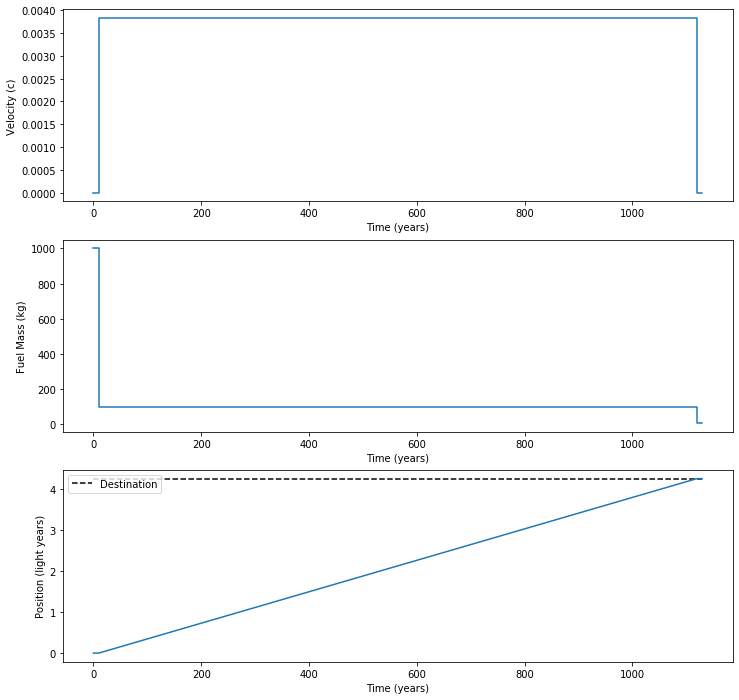

In [139]:
fig = ss.plot_history()
fig.show()

In [135]:
ss.fuel_mass

9.19080919080919*kg

In [137]:
fig.savefig('../images/proxima_centauri.png')

In [140]:
ss.time / yr

1129.3494507938383